In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
# set global seed 
random.seed(42)


In [30]:
df_genres = pd.read_csv('../data/df_genres.csv')
df_ratings = pd.read_csv('../data/ratings_with_description.csv')
genres_list = ['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
# add the red dots for the datapoints in the files: "../data/recommendations/user_recommendations_genres.pkl" and "../data/recommendations/user_recommendations_min_hash.pkl"
dict_user_recommendations_genres = pd.read_pickle('../data/recommendations/user_recommendations_genres.pkl')
dict_user_recommendations_min_hash = pd.read_pickle('../data/recommendations/user_recommendations_min_hash.pkl')
dict_user_recommendations_bert = pd.read_pickle('../data/recommendations/user_recommendations_bert.pkl')

# the data is {userid: [(movieId, score), ...], ...}


In [4]:
dict_user_recommendations_genres

{304: [(50, 1.0),
  (83, 1.0),
  (142, 1.0),
  (170, 1.0),
  (196, 1.0),
  (209, 1.0),
  (335, 1.0),
  (360, 1.0),
  (366, 1.0),
  (401, 1.0),
  (475, 1.0),
  (477, 1.0),
  (492, 1.0),
  (522, 1.0),
  (606, 1.0),
  (651, 1.0),
  (698, 1.0),
  (724, 1.0),
  (728, 1.0),
  (736, 1.0),
  (800, 1.0),
  (833, 1.0),
  (932, 1.0),
  (944, 1.0),
  (966, 1.0),
  (1017, 1.0),
  (1129, 1.0),
  (1164, 1.0),
  (1424, 1.0),
  (1425, 1.0),
  (1487, 1.0),
  (1550, 1.0),
  (1558, 1.0),
  (1560, 1.0),
  (1582, 1.0),
  (1669, 1.0),
  (1730, 1.0),
  (1768, 1.0),
  (1775, 1.0),
  (1849, 1.0),
  (1870, 1.0),
  (1896, 1.0),
  (1932, 1.0),
  (1994, 1.0),
  (2026, 1.0),
  (2048, 1.0),
  (2057, 1.0),
  (2062, 1.0),
  (2114, 1.0),
  (2121, 1.0),
  (2184, 1.0),
  (2203, 1.0),
  (2273, 1.0),
  (2288, 1.0),
  (2294, 1.0),
  (2305, 1.0),
  (2311, 1.0),
  (2318, 1.0),
  (2582, 1.0),
  (2583, 1.0),
  (2643, 1.0),
  (2712, 1.0),
  (2834, 1.0),
  (2853, 1.0),
  (2890, 1.0),
  (2925, 1.0),
  (3030, 1.0),
  (3061, 1.0),
  

In [6]:
# run the pca on the genres
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df_genres[genres_list].values
# do not standardize the data
#X = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)

df = df_genres.copy()
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]



In [32]:
#movies which userid 304 has rate 5.0
df_ratings[df_ratings['userId'] == 304][df_ratings['rating'] == 5.0]

C:\Users\khali\AppData\Local\Temp\ipykernel_18452\2966932150.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ratings[df_ratings['userId'] == 304][df_ratings['rating'] == 5.0]


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,id,description
336381,304,527,5.0,1319220219,Schindler's List (1993),Drama|War,108052,424.0,108052,"In German-occupied Poland during World War II,..."
943711,304,1200,5.0,1319220658,Aliens (1986),Action|Adventure|Horror|Sci-Fi,90605,679.0,90605,Fifty-seven years after surviving an apocalypt...
5343224,304,5010,5.0,1319221021,Black Hawk Down (2001),Action|Drama|War,265086,855.0,265086,The story of 160 elite U.S. soldiers who dropp...
5919129,304,58559,5.0,1319220279,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,468569,155.0,468569,When the menace known as the Joker wreaks havo...
6040942,304,50,5.0,1319220216,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,114814,A sole survivor tells of the twisty events lea...


movieid 11529 not found
movieid 46863 not found
movieid 49675 not found
movieid 41967 not found
movieid 37239 not found
movieid 17681 not found
movieid 10076 not found
movieid 28814 not found
movieid 25713 not found
movieid 27507 not found
movieid 21704 not found
movieid 8354 not found
movieid 35952 not found
movieid 39387 not found
movieid 46792 not found
movieid 35965 not found
movieid 48432 not found
movieid 12374 not found
movieid 31641 not found
movieid 27893 not found
movieid 27055 not found
movieid 36526 not found
movieid 33664 not found
movieid 24768 not found
movieid 2834 not found
movieid 23021 not found
movieid 27649 not found
movieid 9504 not found
movieid 50538 not found
movieid 21833 not found
movieid 35187 not found
movieid 10050 not found
movieid 8177 not found
movieid 17494 not found
movieid 9141 not found
movieid 12684 not found
movieid 10098 not found
movieid 37200 not found
movieid 46952 not found
movieid 35845 not found
movieid 48271 not found
movieid 14117 not fou

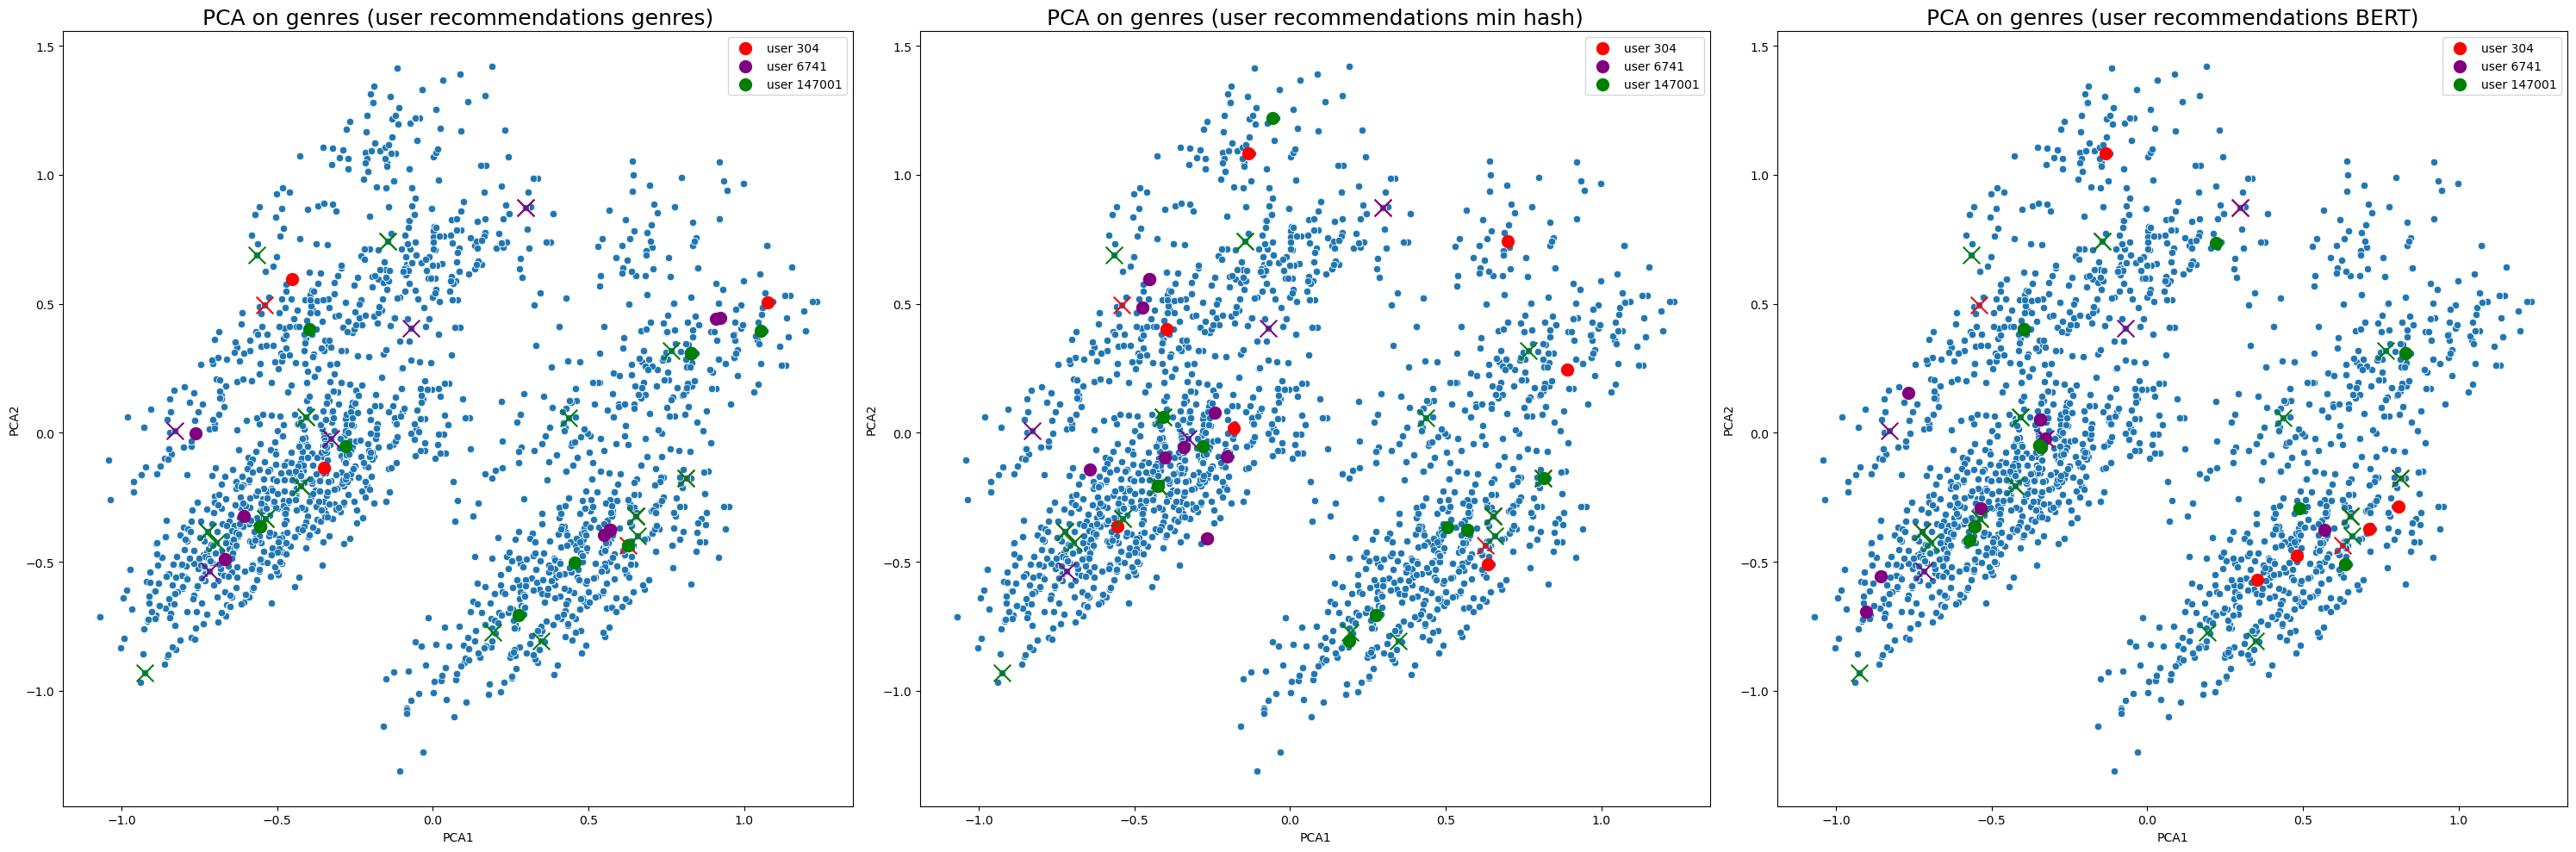

In [35]:
# Extend the layout to 1x3
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Increased figure width for 3 subplots

K = 10  # Number of top recommendations to plot

# Function to add movies rated 5.0 by users as X's without adding to legend
def add_rated_movies(ax, df_ratings, user_id, color):
    rated_movies = df_ratings[(df_ratings['userId'] == user_id) & (df_ratings['rating'] == 5.0)]
    for _, row in rated_movies.iterrows():
        try:
            x = df[df['movieId'] == row['movieId']]['pca1'].values[0]
            y = df[df['movieId'] == row['movieId']]['pca2'].values[0]
            ax.scatter(x, y, color=color, s=200, marker='x')  # Do not add label here
        except:
            print(f"movieid {row['movieId']} not found for user {user_id}")

# Plot for df_user_recommendations_genres
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[0])
axes[0].set_title('PCA on genres (user recommendations genres)', fontsize=18)
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

colors = ['red', 'purple', 'green']
for i, (userid, recommendations_) in enumerate(recommendations_genres_sort.items()):
    legend_added = False
    random.seed(42)
    recommendations = random.sample(recommendations_, min(len(recommendations_), 1000))
    count_dots = 0
    for movieid, score in recommendations:
        if count_dots >= K:
            break
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            title = df[df['movieId'] == movieid]['title'].values[0]
            if not legend_added:
                axes[0].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[0].scatter(x, y, color=colors[i], s=100)
            count_dots += 1
        except:
            print(f"movieid {movieid} not found")
    # Add rated 5.0 movies
    add_rated_movies(axes[0], df_ratings, userid, colors[i])

axes[0].legend()

# Plot for df_user_recommendations_min_hash
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[1])
axes[1].set_title('PCA on genres (user recommendations min hash)', fontsize=18)
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

for i, (userid, recommendations) in enumerate(dict_user_recommendations_min_hash.items()):
    legend_added = False
    for movieid, score in recommendations[:K]:
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            title = df[df['movieId'] == movieid]['title'].values[0]
            if not legend_added:
                axes[1].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[1].scatter(x, y, color=colors[i], s=100)
        except:
            print(f"movieid {movieid} not found")
    # Add rated 5.0 movies
    add_rated_movies(axes[1], df_ratings, userid, colors[i])

axes[1].legend()

# Plot for df_user_recommendations_bert
sns.scatterplot(data=df, x='pca1', y='pca2', ax=axes[2])
axes[2].set_title('PCA on genres (user recommendations BERT)', fontsize=18)
axes[2].set_xlabel('PCA1')
axes[2].set_ylabel('PCA2')

for i, (userid, recommendations) in enumerate(dict_user_recommendations_bert.items()):
    legend_added = False
    for movieid, score in recommendations[:K]:
        try:
            x = df[df['movieId'] == movieid]['pca1'].values[0]
            y = df[df['movieId'] == movieid]['pca2'].values[0]
            title = df[df['movieId'] == movieid]['title'].values[0]
            if not legend_added:
                axes[2].scatter(x, y, color=colors[i], s=100, label=f'user {userid}')
                legend_added = True
            else:
                axes[2].scatter(x, y, color=colors[i], s=100)
        except:
            print(f"movieid {movieid} not found")
    # Add rated 5.0 movies
    add_rated_movies(axes[2], df_ratings, userid, colors[i])

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.savefig('../figs/pca_genres.png')
plt.show()


[0.15836109 0.12812539]
0.28648647970950714


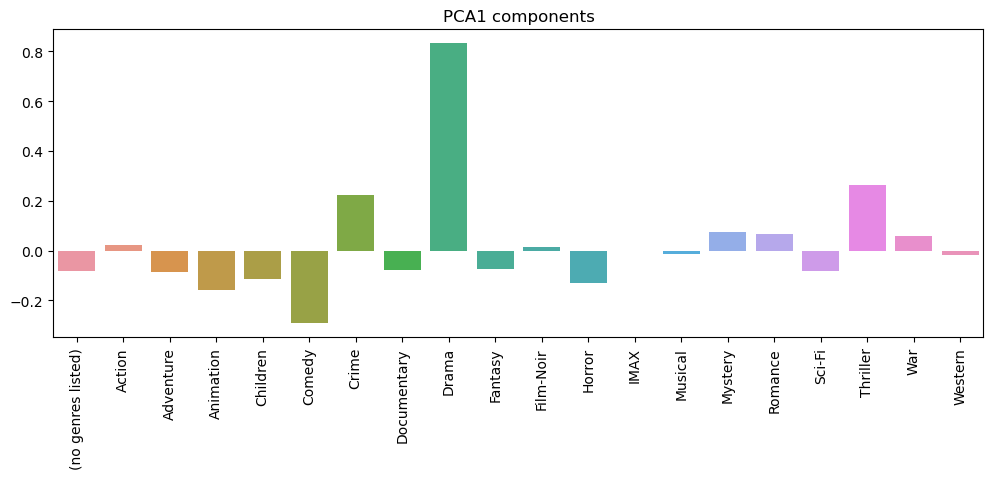

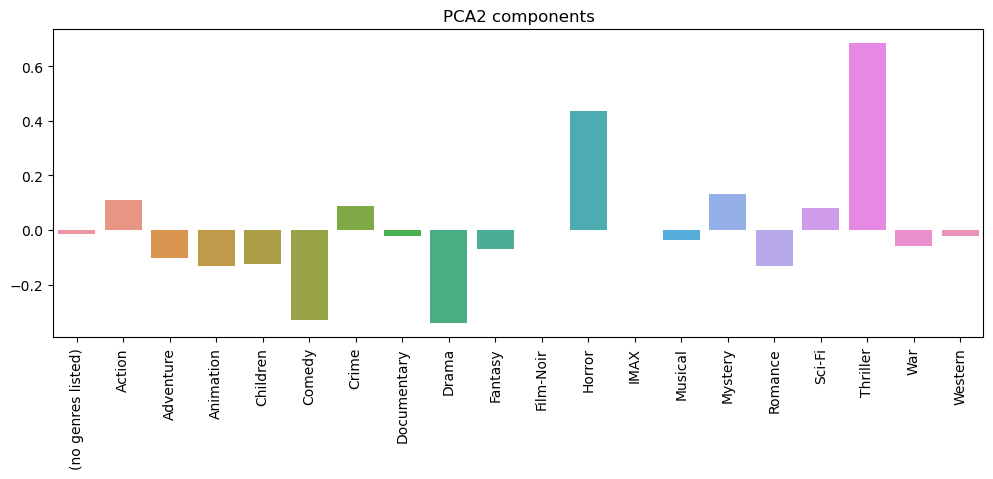

In [9]:
# print explained variance
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PCA1 components')
plt.show()

# plot pca components
plt.figure(figsize=(12,4))
sns.barplot(x=genres_list, y=pca.components_[1])
plt.xticks(rotation=90)
plt.title('PCA2 components')
plt.show()


#### bert

In [13]:
dict_user_recommendations_bert.get(304)

[(115784, 0.999975887345679),
 (157435, 0.999975887345679),
 (164212, 0.999975887345679),
 (195675, 0.999975887345679),
 (4504, 0.999975887345679),
 (80260, 0.9999638310185185),
 (82179, 0.9999638310185185),
 (149526, 0.9999638310185185),
 (113286, 0.9999638310185185),
 (177877, 0.9999638310185185),
 (179239, 0.9999638310185185),
 (194590, 0.9999638310185185),
 (256677, 0.9999638310185185),
 (5262, 0.9999638310185185),
 (174507, 0.9999638310185185),
 (182775, 0.9999638310185185),
 (2944, 0.999951774691358),
 (26561, 0.999951774691358),
 (40851, 0.999951774691358),
 (72261, 0.999951774691358),
 (73000, 0.999951774691358),
 (175231, 0.999951774691358),
 (176513, 0.999951774691358),
 (205365, 0.999951774691358),
 (208795, 0.999951774691358),
 (209573, 0.999951774691358),
 (246392, 0.999951774691358),
 (279112, 0.999951774691358),
 (91747, 0.999951774691358),
 (173007, 0.999951774691358),
 (182341, 0.999951774691358),
 (1375, 0.999951774691358),
 (177665, 0.999951774691358),
 (25834, 0.999